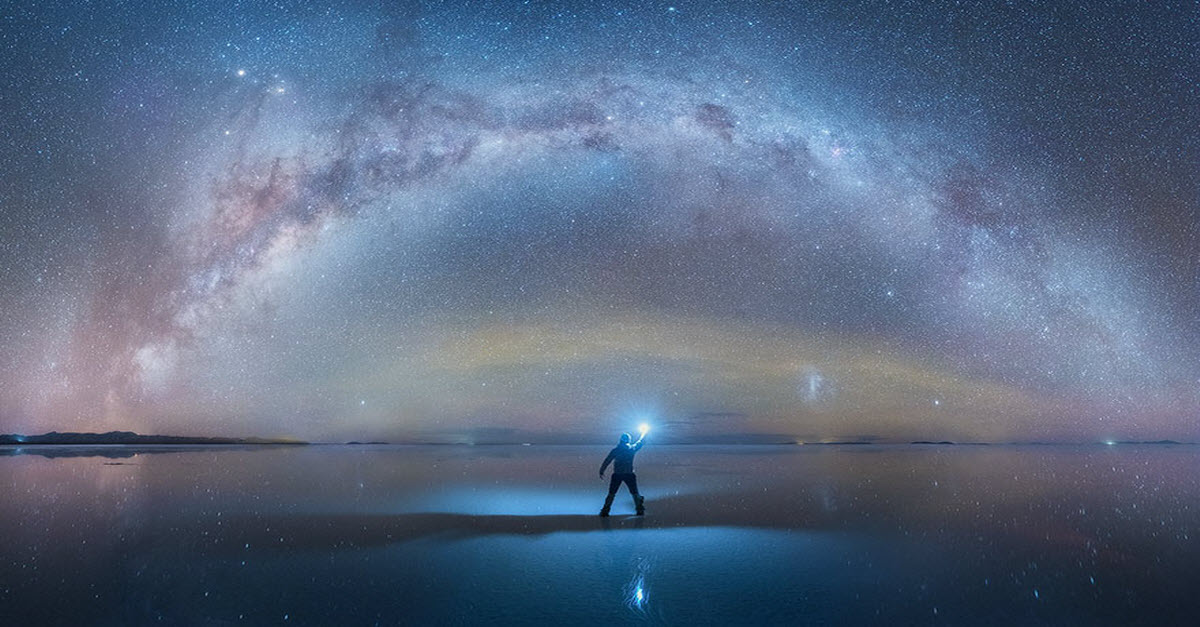

In [1]:
# 크롤링에 사용할 라이브러리를 설치하고 import 한다.
# !pip install requests → 크롤링할 사이트에 접속해서 html 문서를 읽어오는 라이브러리
# !pip install beautifulsoup4 → html을 parsing 해주는 라이브러리

import requests
from bs4 import BeautifulSoup

from IPython.display import Image # 이미지를 불러올 수 있게 하는 라이브러리
# Image(".\images\milky way.jpg", width = "1000")

In [2]:
'''
# 네이버 실시간 검색어 크롤링 → 옛날에 쓰던방법
request = requests.get("https://www.naver.com/")
print(request) # <Response [200]> → 이라고 뜨면 타겟 사이트에 정상적으로 접속했다는 뜻
# 타겟 사이트에서 읽오온 내용 중 html 태그(text)만 읽어오는 기능
html = request.text
print(html)
'''
pass

In [3]:
# 네이버 실시간 검색어 크롤링
# 2020년 3월 이후 ajax를 이용해 실시간검색어를 받아오는 거로 변경되어 별도의 방식을 써야한다.
# 개발자모드 활성화(Crome에서 F12) → 네이버 실시간 검색어 클릭 → Network → XHR(ajax를 의미) → srchrank?frm → Headers → Request URL주소
# URL 하단에 Request Method라고 있는데 화면상 보이는 것은 Get으로 표시되고 보이지 않는것은 Post로 표시되며 해당 메소드를 사용하여 받아야 한다.
# requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 json으로 받는다.
request = requests.get("https://www.naver.com/srchrank/srchrank?frm=main&ag=all&gr=0&ma=-2&si=-2&en=-2&sp=-2")
print(request)

<Response [200]>


In [4]:
# 실시간 검색어 저장
word = request.text
print(type(word))
print(word)

<class 'str'>
{"ts":"2020-06-18T21:14:00+0900","sm":"agallgr0mamsimenmspm","rop":[{"ag":"all"},{"gr":"00"},{"ma":"-2"},{"si":"-2"},{"en":"-2"},{"sp":"-2"}],"data":[{"rank":1,"keyword":"뉴칼레도니아","keyword_synonyms":[]},{"rank":2,"keyword":"현대엘리베이터","keyword_synonyms":[]},{"rank":3,"keyword":"이투스","keyword_synonyms":[]},{"rank":4,"keyword":"팬데믹 뜻","keyword_synonyms":[]},{"rank":5,"keyword":"2020 6월 모의고사 답지","keyword_synonyms":[]},{"rank":6,"keyword":"2020 고1 6월 모의고사","keyword_synonyms":[]},{"rank":7,"keyword":"덱사메타손 관련주","keyword_synonyms":[]},{"rank":8,"keyword":"메디톡신","keyword_synonyms":[]},{"rank":9,"keyword":"2021 6월 모의고사","keyword_synonyms":[]},{"rank":10,"keyword":"수만휘","keyword_synonyms":[]},{"rank":11,"keyword":"2019 6월 고1 모의고사","keyword_synonyms":[]},{"rank":12,"keyword":"홍사덕","keyword_synonyms":[]},{"rank":13,"keyword":"2020 6월 고1 모의고사","keyword_synonyms":[]},{"rank":14,"keyword":"평가원","keyword_synonyms":[]},{"rank":15,"keyword":"2020 6월 모의고사","keyword_synonyms":[]},{"rank":16,"k

In [5]:
# json 형태의 실시간 검색어를 딕셔너리로 변환시키는 json 모듈을 import
import json

In [6]:
# json 모듈의 loads() 메소드를 사용해서json 데이터를 딕셔너리 타입으로 변환
word_json = json.loads(word)
# print(type(word_json))
# print(word_json)
# print(word_json['data']) # data key의 values를 가져오기
# 딕셔너리에서 실시간 검색어만 얻어오기 → 리스트 타입의 데이터가 얻어진다
ranks = word_json.get("data")
print(type(ranks))
print(ranks)

<class 'list'>
[{'rank': 1, 'keyword': '뉴칼레도니아', 'keyword_synonyms': []}, {'rank': 2, 'keyword': '현대엘리베이터', 'keyword_synonyms': []}, {'rank': 3, 'keyword': '이투스', 'keyword_synonyms': []}, {'rank': 4, 'keyword': '팬데믹 뜻', 'keyword_synonyms': []}, {'rank': 5, 'keyword': '2020 6월 모의고사 답지', 'keyword_synonyms': []}, {'rank': 6, 'keyword': '2020 고1 6월 모의고사', 'keyword_synonyms': []}, {'rank': 7, 'keyword': '덱사메타손 관련주', 'keyword_synonyms': []}, {'rank': 8, 'keyword': '메디톡신', 'keyword_synonyms': []}, {'rank': 9, 'keyword': '2021 6월 모의고사', 'keyword_synonyms': []}, {'rank': 10, 'keyword': '수만휘', 'keyword_synonyms': []}, {'rank': 11, 'keyword': '2019 6월 고1 모의고사', 'keyword_synonyms': []}, {'rank': 12, 'keyword': '홍사덕', 'keyword_synonyms': []}, {'rank': 13, 'keyword': '2020 6월 고1 모의고사', 'keyword_synonyms': []}, {'rank': 14, 'keyword': '평가원', 'keyword_synonyms': []}, {'rank': 15, 'keyword': '2020 6월 모의고사', 'keyword_synonyms': []}, {'rank': 16, 'keyword': '게놈', 'keyword_synonyms': []}, {'rank': 17, 'ke

In [11]:
# 실시간 검색어가 저장된 리스트에는 검색어 순위별로 각각 딕셔너리 타입으로 저장되어 있다.

# for rank in ranks:
#    print(rank)
    
for rank in ranks:
    print("{:2d} : {}".format(rank["rank"], rank["keyword"]))

 1 : 뉴칼레도니아
 2 : 현대엘리베이터
 3 : 이투스
 4 : 팬데믹 뜻
 5 : 2020 6월 모의고사 답지
 6 : 2020 고1 6월 모의고사
 7 : 덱사메타손 관련주
 8 : 메디톡신
 9 : 2021 6월 모의고사
10 : 수만휘
11 : 2019 6월 고1 모의고사
12 : 홍사덕
13 : 2020 6월 고1 모의고사
14 : 평가원
15 : 2020 6월 모의고사
16 : 게놈
17 : 2020년 6월 모의고사 고1 등급컷
18 : 설해원
19 : 스톤에이지 월드
20 : 노수광
